In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

import scipy
import scipy.misc
import scipy.cluster

In [4]:
def quantizetopalette(silf, palette, dither=False):
    """Convert an RGB or L mode image to use a given P image's palette."""
   
    silf.load()

    palette.load()
    if palette.mode != "P":
        raise ValueError("bad mode for palette image")
    if silf.mode != "RGB" and silf.mode != "L":
        raise ValueError(
            "only RGB or L mode images can be quantized to a palette"
            )
    im = silf.im.convert("P", 1 if dither else 0, palette.im)
   
    try:
        return silf._new(im)
    except AttributeError:
        return silf._makeself(im)


def convert_image(image, ncolors = 8):
    
    image = image.convert('RGB') 
    NUM_CLUSTERS = ncolors 
    
    ar = np.array(image) 
    
    shape = ar.shape
    ar = ar.reshape(np.product(shape[:2]), shape[2]).astype(float)

    print('finding ' + str(ncolors) + ' most common colors.  Note, if "ncolors" is large, this can take a while...')
    codes, dist = scipy.cluster.vq.kmeans(ar, NUM_CLUSTERS)
    print('Done finding colors! cluster centres in RGB:\n', codes)

    vecs, dist = scipy.cluster.vq.vq(ar, codes)       
    counts, bins = np.histogram(vecs, len(codes))    
    

    reds = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,0])).astype('int')
    greens = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,1])).astype('int')
    blues = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,2])).astype('int')

 
    myPalette = []
    for i in range(256):
        myPalette.extend( (reds[i],greens[i],blues[i]))
        
    palimage = Image.new('P', (16, 16)) # placeholder image
    palimage.putpalette(myPalette)
    newimage = quantizetopalette(image, palimage, dither=False)
    newimage = newimage.convert('RGB')
    return newimage, codes


def convert_image_specific(image, colors = [ [255, 255, 255], [255, 0, 0], [0,0,255], [0, 0, 0] ]):
    image = image.convert('RGB') 
    NUM_CLUSTERS = len(colors) 
    codes = np.array(colors) 

    reds = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,0])).astype('int')
    greens = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,1])).astype('int')
    blues = np.round(np.interp(np.linspace(0,255,256), np.linspace(0,NUM_CLUSTERS-1,NUM_CLUSTERS), codes[:,2])).astype('int')


    myPalette = []
    for i in range(256):
        myPalette.extend( (reds[i],greens[i],blues[i]))
        
    palimage = Image.new('P', (16, 16)) 
    palimage.putpalette(myPalette)
    newimage = quantizetopalette(image, palimage, dither=False)
    newimage = newimage.convert('RGB')
    return newimage, codes

In [5]:
im1 = Image.open("siamese_cat.png")


In [6]:
c

finding 8 most common colors.  Note, if "ncolors" is large, this can take a while...
Done finding colors! cluster centres in RGB:
 [[230.27280663 225.90266259 217.57835007]
 [167.80981595 150.83718735 132.99150543]
 [244.10201243 243.68431791 240.65658908]
 [250.77532955 250.75363225 249.95819301]
 [200.73304826 185.0565058  167.51954795]
 [129.25619152 115.03935058 102.02311502]
 [ 42.63502575  41.11442237  40.47093451]
 [ 82.69320924  75.65322303  71.34436401]]


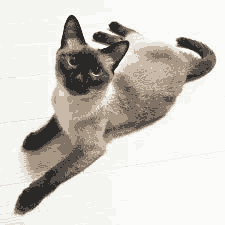

In [7]:
new_im1


In [8]:
im_data = np.array(new_im1)
unique_colors = np.unique(im_data.reshape(-1,im_data.shape[2]),axis = 0)
unique_colors
number_of_pixels_of_a_color = []
color_lables = []
color_values = []

for icolor, rgba in enumerate(unique_colors):
    red_mask = im_data[:,:,0] == rgba[0]
    green_mask = im_data[:,:,1] == rgba[1]
    blue_mask = im_data[:,:,2] == rgba[2]
    
    pixel_mask = red_mask & green_mask & blue_mask
    npixels = len(im_data[pixel_mask])   
    number_of_pixels_of_a_color.append(npixels)
    
    color_lables.append('Color#' + str(icolor))
    
    color_values.append(rgba/255)

In [9]:
number_of_pixels_of_a_color

[2954, 2732, 3661, 4456, 2836, 1510, 14532, 17944]

In [10]:
color_lables

['Color#0',
 'Color#1',
 'Color#2',
 'Color#3',
 'Color#4',
 'Color#5',
 'Color#6',
 'Color#7']

In [11]:
color_values

[array([0.16862745, 0.16078431, 0.15686275]),
 array([0.3254902 , 0.29803922, 0.27843137]),
 array([0.50588235, 0.45098039, 0.4       ]),
 array([0.65882353, 0.59215686, 0.52156863]),
 array([0.78823529, 0.7254902 , 0.65882353]),
 array([0.90196078, 0.88627451, 0.85490196]),
 array([0.95686275, 0.95686275, 0.94509804]),
 array([0.98431373, 0.98431373, 0.98039216])]

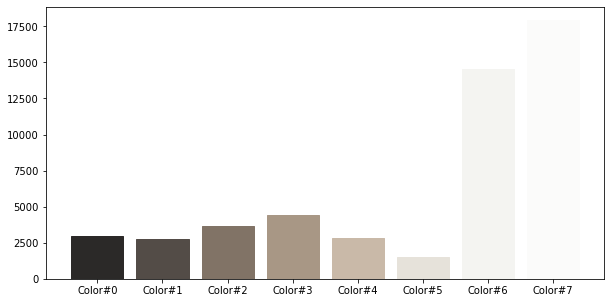

In [12]:
fig, ax = plt.subplots(figsize=(10,5))
myBarChart = ax.bar(color_lables, number_of_pixels_of_a_color)

for i in range(len(myBarChart)):
    myBarChart[i].set_color(color_values[i])

plt.show()

In [13]:
im2 = Image.open('siamese_cat_painting.png')


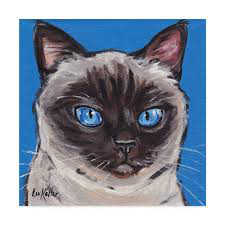

In [14]:
im2

In [15]:
new_im2, new_rgbs = convert_image(im2, ncolors = 8)

finding 8 most common colors.  Note, if "ncolors" is large, this can take a while...
Done finding colors! cluster centres in RGB:
 [[200.69228221 193.3759523  191.52202716]
 [ 42.91765792 115.95939295 182.6671452 ]
 [ 46.13163033  38.18857794  43.56003905]
 [111.1620844   98.42295396 104.6665601 ]
 [ 72.48836234  63.97336968  71.67875865]
 [178.0038693  168.32308684 167.22226999]
 [253.5172546  254.3221498  254.22533231]
 [148.48789519 137.77556252 141.09085731]]


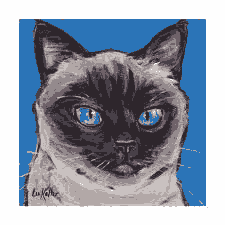

In [16]:
new_im2


In [17]:
im_data = np.array(new_im2)
unique_colors = np.unique(im_data.reshape(-1,im_data.shape[2]),axis = 0)
unique_colors
number_of_pixels_of_a_color = []
color_lables = []
color_values = []

for icolor, rgba in enumerate(unique_colors):
    red_mask = im_data[:,:,0] == rgba[0]
    green_mask = im_data[:,:,1] == rgba[1]
    blue_mask = im_data[:,:,2] == rgba[2]
    
    pixel_mask = red_mask & green_mask & blue_mask
    npixels = len(im_data[pixel_mask])   
    number_of_pixels_of_a_color.append(npixels)
    
    color_lables.append('Color#' + str(icolor))
    
    color_values.append(rgba/255)

In [18]:
number_of_pixels_of_a_color

[9692, 6653, 4515, 3346, 3702, 4438, 2629, 15650]

In [19]:
color_lables

['Color#0',
 'Color#1',
 'Color#2',
 'Color#3',
 'Color#4',
 'Color#5',
 'Color#6',
 'Color#7']

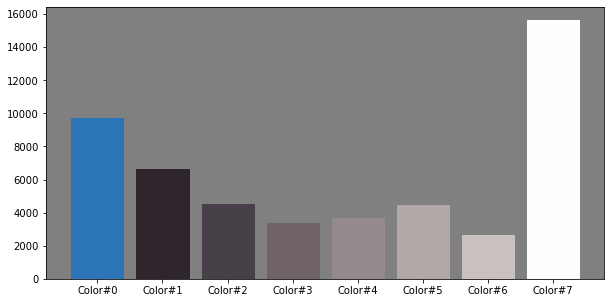

In [20]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_facecolor("gray")
myBarChart = ax.bar(color_lables, number_of_pixels_of_a_color)

for i in range(len(myBarChart)):
    myBarChart[i].set_color(color_values[i])

plt.show()

In [27]:
im3 = Image.open("siamese_cat_cartoon.png")

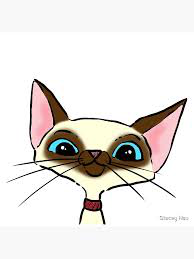

In [28]:
im3

In [34]:
new_im3, new_rgbs = convert_image(im3, ncolors = 8)

finding 8 most common colors.  Note, if "ncolors" is large, this can take a while...
Done finding colors! cluster centres in RGB:
 [[228.07586837 177.71389397 178.09780622]
 [136.29344433 152.25702393 144.48907388]
 [247.86309776 247.96734377 247.72118776]
 [ 16.20494336   8.0592173    5.09680742]
 [254.84464783 254.86880223 254.83461998]
 [ 87.64778955  60.18487395  34.00584582]
 [240.97550521 206.01041029 206.33374158]
 [251.75457021 251.21392454 220.98171918]]


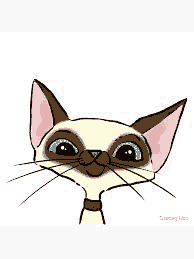

In [35]:
new_im3

In [36]:
im_data = np.array(new_im3)
unique_colors = np.unique(im_data.reshape(-1,im_data.shape[2]),axis = 0)
unique_colors
number_of_pixels_of_a_color = []
color_lables = []
color_values = []

for icolor, rgba in enumerate(unique_colors):
    red_mask = im_data[:,:,0] == rgba[0]
    green_mask = im_data[:,:,1] == rgba[1]
    blue_mask = im_data[:,:,2] == rgba[2]
    
    pixel_mask = red_mask & green_mask & blue_mask
    npixels = len(im_data[pixel_mask])   
    number_of_pixels_of_a_color.append(npixels)
    
    color_lables.append('Color#' + str(icolor))
    
    color_values.append(rgba/255)

In [37]:
number_of_pixels_of_a_color

[1882, 2785, 922, 1134, 1498, 14813, 2720, 24492]

In [38]:
color_lables

['Color#0',
 'Color#1',
 'Color#2',
 'Color#3',
 'Color#4',
 'Color#5',
 'Color#6',
 'Color#7']

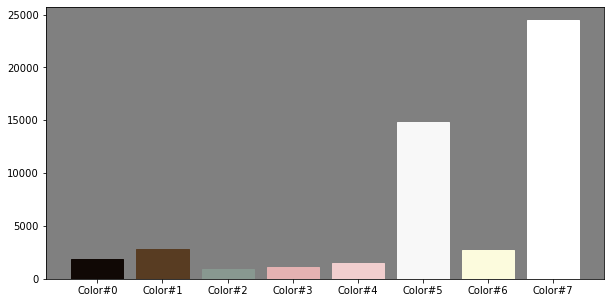

In [39]:
fig, ax = plt.subplots(figsize=(10,5))
ax.set_facecolor("gray")
myBarChart = ax.bar(color_lables, number_of_pixels_of_a_color)

for i in range(len(myBarChart)):
    myBarChart[i].set_color(color_values[i])

plt.show()